In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.fftpack import dct, idct
%matplotlib inline

In [2]:
def split_and_rescale ( X ):
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform( X )
    return (X_scaled)

In [3]:
df=pd.read_csv('data/2018-01-01__2019-01-01__NConservatory__allMerged.csv')

In [4]:
y1=df['temp_1'].values
y2=df['co2_1'].values
y3=df['dew_1'].values
y4=df['relH_1'].values

In [5]:
y1_scaled = split_and_rescale(y1.reshape(-1, 1))
y2_scaled = split_and_rescale(y2.reshape(-1, 1))
y3_scaled = split_and_rescale(y3.reshape(-1, 1))
y4_scaled = split_and_rescale(y4.reshape(-1, 1))

In [6]:
y=y1_scaled+y2_scaled+y3_scaled+y4_scaled
y=np.squeeze(y)

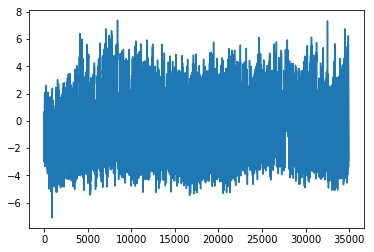

In [7]:
plt.plot(y)

In [8]:
x=np.concatenate((y1_scaled,y2_scaled,y3_scaled,y4_scaled),axis=1)

In [9]:
x.shape

(34934, 4)

In [10]:
from keras.layers import Dense, Activation
from keras.models import Sequential
import keras

Using TensorFlow backend.


In [11]:
model = Sequential()
model.add(Dense(32, input_shape=(4,)))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
model.fit(x, y, batch_size=100, epochs=10, validation_split=0.3, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 24453 samples, validate on 10481 samples
Epoch 1/10
24453/24453 [==============================] - 0s 12us/step - loss: 0.9029 - val_loss: 0.0014
Epoch 2/10
24453/24453 [==============================] - 0s 7us/step - loss: 1.6382e-04 - val_loss: 4.0099e-05
Epoch 3/10
24453/24453 [==============================] - 0s 6us/step - loss: 3.5201e-05 - val_loss: 2.1866e-05
Epoch 4/10
24453/24453 [==============================] - 0s 7us/step - loss: 1.7955e-05 - val_loss: 1.0349e-05
Epoch 5/10
24453/24453 [==============================] - 0s 6us/step - loss: 7.7735e-06 - val_loss: 3.8648e-06
Epoch 6/10
24453/24453 [==============================] - 0s 7us/step - loss: 2.8386e-06 - val_loss: 1.2739e-06
Epoch 7/10
24453/24453 [==============================] - 0s 7us/step - loss: 8.5830e-07 - val_loss: 3.6046e-07
Epoch 8/10
24453/24453 [==============================] - 0s 6us/step - loss: 2.1321e-07 - val_loss: 7.5814e-08
Epoch 9/10
24

In [14]:
pred=model.predict(x)

In [15]:
pred=np.squeeze(pred)

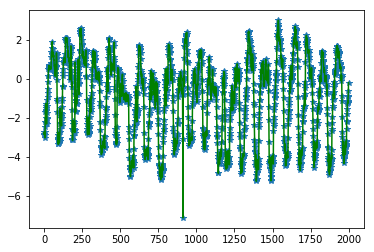

In [16]:
plt.plot(pred[0:2000],'*')
plt.plot(y[0:2000],'g')